In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555273,555273,280838,C9b6Aa2csiogu3vVp9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555274,555274,280839,CGDT4r4PAbp3mvaI6k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555275,555275,280840,CJUxTk4Qd0kHliUKR9,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1
555276,555276,280841,CknUJi2R1iYJG3li3k,103.255.15.42,138,103.255.15.255,138,0.000000,1,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,XMRIGCC CryptoMiner,1


In [5]:
df.Label.value_counts()

Label
0    517582
1     37696
Name: count, dtype: int64

In [6]:
#Sampling
# 20% sampling for minority classes and 10% each for majority classes
df_BruteForce_XML = df[df['traffic_category'] == 'Bruteforce-XML']
df_BruteForce_XML = df_BruteForce_XML.sample(frac=0.2, replace=False, random_state=None)

df_BruteForce = df[df['traffic_category'] == 'Bruteforce']
df_BruteForce = df_BruteForce.sample(frac=0.2, replace=False, random_state=None)

df_Probing = df[df['traffic_category'] == 'Probing']
df_Probing = df_Probing.sample(frac=0.2, replace=False, random_state=None)

df_XMRIGCC_CryptoMiner = df[df['traffic_category'] == 'XMRIGCC CryptoMiner']
df_XMRIGCC_CryptoMiner = df_XMRIGCC_CryptoMiner.sample(frac=0.2, replace=False, random_state=None)

df_Background = df[df['traffic_category'] == 'Background']
df_Background = df_Background.sample(frac=0.1, replace=False, random_state=None)

df_Benign = df[df['traffic_category'] == 'Benign']
df_Benign = df_Benign.sample(frac=0.1, replace=False, random_state=None)


In [7]:
# Concatenate the DataFrames
df_saved = pd.concat([df_BruteForce_XML, df_BruteForce, df_Probing, df_XMRIGCC_CryptoMiner, df_Background, df_Benign], ignore_index=True)
df_saved

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1798,1798,CrDsZL1wD0Ns7EyoZ2,103.255.15.23,3470,128.199.242.104,443,11.840379,14,13,...,1.160979e+07,1.160979e+07,1.160979e+07,1.160979e+07,0.0,29200,65160,0,Bruteforce-XML,1
1,2314,2314,CTyB9W24th1MgWAN07,103.255.15.23,5232,128.199.242.104,443,6.669837,14,13,...,6.451875e+06,6.451875e+06,6.451875e+06,6.451875e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2078,2078,CfYEzT1pj4yIqul1gc,103.255.15.23,4346,128.199.242.104,443,8.925519,14,13,...,8.691713e+06,8.691713e+06,8.691713e+06,8.691713e+06,0.0,29200,65160,0,Bruteforce-XML,1
3,4520,4520,CFbExdRV91hilmp5,103.255.15.23,13306,128.199.242.104,443,9.091145,14,14,...,8.633859e+06,8.633859e+06,8.633859e+06,8.633859e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,1243,1243,CPeK2t1i0iGAaa2mL6,103.255.15.23,65042,128.199.242.104,443,13.457300,14,13,...,1.323176e+07,1.323176e+07,1.323176e+07,1.323176e+07,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,413483,235034,CCs5Sn20oOb0PNNWga,103.255.15.150,37122,128.199.242.104,443,0.233242,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0
59294,209126,28737,CTELMf3X30K7HTB1sb,103.255.15.23,26644,8.8.8.8,53,0.025130,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59295,469784,291883,C8MTfqQIxU9lIEL3b,103.255.15.150,56681,8.8.8.8,53,0.029082,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59296,403775,225326,CHFgrU2n1bOSEomJ1a,103.255.15.150,56782,8.8.8.8,53,0.025798,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0


In [8]:
# Save the sampled dataset
df_saved.to_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv',index=0)

In [9]:
df = pd.read_csv('/Users/suchirmvelpanur/Desktop/ISFCR Internship/datasets/IDS Datasets/ALLFLOWMETER_HIKARI2021_sample.csv')
df

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1798,1798,CrDsZL1wD0Ns7EyoZ2,103.255.15.23,3470,128.199.242.104,443,11.840379,14,13,...,1.160979e+07,1.160979e+07,1.160979e+07,1.160979e+07,0.0,29200,65160,0,Bruteforce-XML,1
1,2314,2314,CTyB9W24th1MgWAN07,103.255.15.23,5232,128.199.242.104,443,6.669837,14,13,...,6.451875e+06,6.451875e+06,6.451875e+06,6.451875e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2078,2078,CfYEzT1pj4yIqul1gc,103.255.15.23,4346,128.199.242.104,443,8.925519,14,13,...,8.691713e+06,8.691713e+06,8.691713e+06,8.691713e+06,0.0,29200,65160,0,Bruteforce-XML,1
3,4520,4520,CFbExdRV91hilmp5,103.255.15.23,13306,128.199.242.104,443,9.091145,14,14,...,8.633859e+06,8.633859e+06,8.633859e+06,8.633859e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,1243,1243,CPeK2t1i0iGAaa2mL6,103.255.15.23,65042,128.199.242.104,443,13.457300,14,13,...,1.323176e+07,1.323176e+07,1.323176e+07,1.323176e+07,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,413483,235034,CCs5Sn20oOb0PNNWga,103.255.15.150,37122,128.199.242.104,443,0.233242,9,12,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0
59294,209126,28737,CTELMf3X30K7HTB1sb,103.255.15.23,26644,8.8.8.8,53,0.025130,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59295,469784,291883,C8MTfqQIxU9lIEL3b,103.255.15.150,56681,8.8.8.8,53,0.029082,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59296,403775,225326,CHFgrU2n1bOSEomJ1a,103.255.15.150,56782,8.8.8.8,53,0.025798,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0


In [10]:
# checking the shape of the dataset
shape = df.shape

print(f"The shape of the dataframe is {shape[0]} rows and {shape[1]} columns")

The shape of the dataframe is 59298 rows and 88 columns


In [11]:
# checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.1              59298 non-null  int64  
 1   Unnamed: 0                59298 non-null  int64  
 2   uid                       59298 non-null  object 
 3   originh                   59298 non-null  object 
 4   originp                   59298 non-null  int64  
 5   responh                   59298 non-null  object 
 6   responp                   59298 non-null  int64  
 7   flow_duration             59298 non-null  float64
 8   fwd_pkts_tot              59298 non-null  int64  
 9   bwd_pkts_tot              59298 non-null  int64  
 10  fwd_data_pkts_tot         59298 non-null  int64  
 11  bwd_data_pkts_tot         59298 non-null  int64  
 12  fwd_pkts_per_sec          59298 non-null  float64
 13  bwd_pkts_per_sec          59298 non-null  float64
 14  flow_p

In [12]:
# summary statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,284068.093123,129460.221458,38507.718254,4864.150764,8.701197,19.388900,20.129735,9.695656,16.580576,1640.142858,...,1.169212e+05,3.405019e+06,4.835350e+06,7.674982e+06,3.961215e+06,7.638808e+05,15620.967824,23311.645620,4331.621505,0.127154
std,168888.505292,101465.856631,18163.595282,12655.221990,73.667218,129.576736,134.176645,83.670056,128.014802,4715.861490,...,1.597407e+06,1.781030e+07,2.282467e+07,7.293070e+07,1.888151e+07,7.115619e+06,14957.489567,29944.348789,10845.511710,0.333149
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,136902.000000,38821.000000,28345.750000,53.000000,0.023278,1.000000,1.000000,1.000000,0.000000,4.339871,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,284746.500000,112938.500000,42558.500000,443.000000,0.028068,2.000000,2.000000,2.000000,2.000000,38.682760,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,432990.500000,202737.500000,53072.000000,443.000000,0.455394,10.000000,12.000000,3.000000,7.000000,79.874769,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555275.000000,350701.000000,65535.000000,64826.000000,11649.377209,8139.000000,8130.000000,2375.000000,7925.000000,125203.104478,...,1.438968e+08,2.968544e+08,2.968544e+08,1.164547e+10,2.968544e+08,1.660871e+08,65535.000000,65535.000000,65535.000000,1.000000


In [13]:
# checking for duplicate rows
duplucate_rows = df.duplicated().sum()

print(f"The number of duplicate rows are {duplucate_rows}.")

The number of duplicate rows are 0.


In [14]:
# checking for the total amount of null values
df.isnull().sum()

Unnamed: 0.1            0
Unnamed: 0              0
uid                     0
originh                 0
originp                 0
                       ..
fwd_init_window_size    0
bwd_init_window_size    0
fwd_last_window_size    0
traffic_category        0
Label                   0
Length: 88, dtype: int64

In [15]:
# Find the number of unique values in each column
unique_counts = df.nunique()

print(unique_counts)

Unnamed: 0.1            59298
Unnamed: 0              55751
uid                     59298
originh                   589
originp                 31879
                        ...  
fwd_init_window_size      135
bwd_init_window_size       80
fwd_last_window_size     1062
traffic_category            6
Label                       2
Length: 88, dtype: int64


In [16]:
value_count = df.value_counts()
value_count

Unnamed: 0.1  Unnamed: 0  uid                 originh         originp  responh          responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  fwd_header_size_min  fwd_header_size_max  bwd_header_size_tot  bwd_header_size_min  bwd_header_size_max  flow_FIN_flag_count  flow_SYN_flag_count  flow_RST_flag_count  fwd_PSH_flag_count  bwd_PSH_flag_count  flow_ACK_flag_count  fwd_URG_flag_count  bwd_URG_flag_count  flow_CWR_flag_count  flow_ECE_flag_count  fwd_pkts_payload.min  fwd_pkts_payload.max  fwd_pkts_payload.tot  fwd_pkts_payload.avg  fwd_pkts_payload.std  bwd_pkts_payload.min  bwd_pkts_payload.max  bwd_pkts_payload.tot  bwd_pkts_payload.avg  bwd_pkts_payload.std  flow_pkts_payload.min  flow_pkts_payload.max  flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  fwd_iat.min  fwd_iat.max   fwd_iat.tot   fwd_iat.avg    fwd_iat.std    bwd_iat.min   

In [17]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
        print("\n")

print_unique_values(df)

Column 'Unnamed: 0.1' has 59298 unique values:
[  1798   2314   2078 ... 469784 403775 318585]


Column 'Unnamed: 0' has 55751 unique values:
[  1798   2314   2078 ... 291883 225326 138923]


Column 'uid' has 59298 unique values:
['CrDsZL1wD0Ns7EyoZ2' 'CTyB9W24th1MgWAN07' 'CfYEzT1pj4yIqul1gc' ...
 'C8MTfqQIxU9lIEL3b' 'CHFgrU2n1bOSEomJ1a' 'CY0xKT2NcVydX6ry2f']


Column 'originh' has 589 unique values:
['103.255.15.23' '103.255.15.150' '103.255.15.42' '103.255.15.27'
 '24.212.41.209' '103.255.15.67' '24.212.71.31' '103.255.15.110'
 '103.255.15.132' '190.210.56.57' '103.255.15.20' '103.255.15.21'
 '103.255.15.146' '192.99.153.148' '100.64.65.26' '45.143.200.6'
 '103.255.15.15' '142.252.253.26' '100.64.65.78' '202.169.224.77'
 '98.160.198.185' '103.210.35.245' '202.169.224.219' '60.254.92.185'
 '142.93.12.43' '103.255.15.89' '146.88.240.4' '120.22.17.61'
 '198.251.83.242' '190.200.41.253' '143.198.234.99' '193.171.123.141'
 '103.255.9.137' '192.241.219.51' '196.6.103.58' '109.230.218.43'
 

In [18]:
df['traffic_category'].unique()

array(['Bruteforce-XML', 'Bruteforce', 'Probing', 'XMRIGCC CryptoMiner',
       'Background', 'Benign'], dtype=object)

In [19]:
df['Label'].unique()

array([1, 0])

In [20]:
filtered_label_0 = df.loc[df['Label'] == 0, 'traffic_category']
print(filtered_label_0.unique())

['Background' 'Benign']


In [21]:
filtered_label_0 = df.loc[df['Label'] == 1, 'traffic_category']
print(filtered_label_0.unique())

['Bruteforce-XML' 'Bruteforce' 'Probing' 'XMRIGCC CryptoMiner']


In [22]:
df.Label.value_counts()

Label
0    51758
1     7540
Name: count, dtype: int64

In [23]:
'''
=> Label 0 corresponding to all normal/benign packets
=> Label 1 corresponds to malicious/unauthorized network traffic
'''

'\n=> Label 0 corresponding to all normal/benign packets\n=> Label 1 corresponds to malicious/unauthorized network traffic\n'

In [24]:
#Preprocessing Stage

In [25]:
# Drop 'uid' and 'Unnamed : 0' columns as it has no relevance to the model
df.drop(columns=['uid', 'Unnamed: 0'], inplace=True)
# Rename 'Unnamed: 0.1' column to 'id'
df.rename(columns={'Unnamed: 0.1': 'id'}, inplace=True)
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,1798,103.255.15.23,3470,128.199.242.104,443,11.840379,14,13,6,5,...,1.160979e+07,1.160979e+07,1.160979e+07,1.160979e+07,0.0,29200,65160,0,Bruteforce-XML,1
1,2314,103.255.15.23,5232,128.199.242.104,443,6.669837,14,13,6,5,...,6.451875e+06,6.451875e+06,6.451875e+06,6.451875e+06,0.0,29200,65160,0,Bruteforce-XML,1
2,2078,103.255.15.23,4346,128.199.242.104,443,8.925519,14,13,6,5,...,8.691713e+06,8.691713e+06,8.691713e+06,8.691713e+06,0.0,29200,65160,0,Bruteforce-XML,1
3,4520,103.255.15.23,13306,128.199.242.104,443,9.091145,14,14,6,5,...,8.633859e+06,8.633859e+06,8.633859e+06,8.633859e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,1243,103.255.15.23,65042,128.199.242.104,443,13.457300,14,13,6,5,...,1.323176e+07,1.323176e+07,1.323176e+07,1.323176e+07,0.0,29200,65160,0,Bruteforce-XML,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,413483,103.255.15.150,37122,128.199.242.104,443,0.233242,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,402,Benign,0
59294,209126,103.255.15.23,26644,8.8.8.8,53,0.025130,2,2,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59295,469784,103.255.15.150,56681,8.8.8.8,53,0.029082,2,2,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0
59296,403775,103.255.15.150,56782,8.8.8.8,53,0.025798,2,2,2,2,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0,0,Benign,0


In [26]:
df.describe()

,id,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,59298.000000,...,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,5.929800e+04,59298.000000,59298.000000,59298.000000,59298.000000
mean,284068.093123,38507.718254,4864.150764,8.701197,19.388900,20.129735,9.695656,16.580576,1640.142858,1611.992229,...,1.169212e+05,3.405019e+06,4.835350e+06,7.674982e+06,3.961215e+06,7.638808e+05,15620.967824,23311.645620,4331.621505,0.127154
std,168888.505292,18163.595282,12655.221990,73.667218,129.576736,134.176645,83.670056,128.014802,4715.861490,4518.274397,...,1.597407e+06,1.781030e+07,2.282467e+07,7.293070e+07,1.888151e+07,7.115619e+06,14957.489567,29944.348789,10845.511710,0.333149
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,136902.000000,28345.750000,53.000000,0.023278,1.000000,1.000000,1.000000,0.000000,4.339871,3.152343,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,284746.500000,42558.500000,443.000000,0.028068,2.000000,2.000000,2.000000,2.000000,38.682760,43.390982,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,0.000000,0.000000,0.000000
75%,432990.500000,53072.000000,443.000000,0.455394,10.000000,12.000000,3.000000,7.000000,79.874769,79.741894,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555275.000000,65535.000000,64826.000000,11649.377209,8139.000000,8130.000000,2375.000000,7925.000000,125203.104478,110376.421053,...,1.438968e+08,2.968544e+08,2.968544e+08,1.164547e+10,2.968544e+08,1.660871e+08,65535.000000,65535.000000,65535.000000,1.000000


In [27]:
# Statistical methods
summary_stats = df.describe()
print(summary_stats)

                  id       originp       responp  flow_duration  fwd_pkts_tot  \
count   59298.000000  59298.000000  59298.000000   59298.000000  59298.000000   
mean   284068.093123  38507.718254   4864.150764       8.701197     19.388900   
std    168888.505292  18163.595282  12655.221990      73.667218    129.576736   
min         0.000000     21.000000      0.000000       0.000000      0.000000   
25%    136902.000000  28345.750000     53.000000       0.023278      1.000000   
50%    284746.500000  42558.500000    443.000000       0.028068      2.000000   
75%    432990.500000  53072.000000    443.000000       0.455394     10.000000   
max    555275.000000  65535.000000  64826.000000   11649.377209   8139.000000   

       bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
count  59298.000000       59298.000000       59298.000000      59298.000000   
mean      20.129735           9.695656          16.580576       1640.142858   
std      134.176645          83.6

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 86 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        59298 non-null  int64  
 1   originh                   59298 non-null  object 
 2   originp                   59298 non-null  int64  
 3   responh                   59298 non-null  object 
 4   responp                   59298 non-null  int64  
 5   flow_duration             59298 non-null  float64
 6   fwd_pkts_tot              59298 non-null  int64  
 7   bwd_pkts_tot              59298 non-null  int64  
 8   fwd_data_pkts_tot         59298 non-null  int64  
 9   bwd_data_pkts_tot         59298 non-null  int64  
 10  fwd_pkts_per_sec          59298 non-null  float64
 11  bwd_pkts_per_sec          59298 non-null  float64
 12  flow_pkts_per_sec         59298 non-null  float64
 13  down_up_ratio             59298 non-null  float64
 14  fwd_he

In [29]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on the entire 'originh' and 'responh' columns
le_originh = LabelEncoder()
le_responh = LabelEncoder()
df['originh'] = le_originh.fit_transform(df['originh'])
df['responh'] = le_responh.fit_transform(df['responh'])


In [30]:
# Apply One-Hot Encoding for 'traffic_category'
df = pd.get_dummies(df, columns=['traffic_category'])


In [31]:
df = df.astype(int)

In [32]:
df

,id,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label,traffic_category_Background,traffic_category_Benign,traffic_category_Bruteforce,traffic_category_Bruteforce-XML,traffic_category_Probing,traffic_category_XMRIGCC CryptoMiner
0,1798,41,3470,457,443,11,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
1,2314,41,5232,457,443,6,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
2,2078,41,4346,457,443,8,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
3,4520,41,13306,457,443,9,14,14,6,5,...,29200,65160,0,1,0,0,0,1,0,0
4,1243,41,65042,457,443,13,14,13,6,5,...,29200,65160,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,413483,35,37122,457,443,0,9,12,3,7,...,29200,65160,402,0,0,1,0,0,0,0
59294,209126,41,26644,2474,53,0,2,2,2,2,...,0,0,0,0,0,1,0,0,0,0
59295,469784,35,56681,2474,53,0,2,2,2,2,...,0,0,0,0,0,1,0,0,0,0
59296,403775,35,56782,2474,53,0,2,2,2,2,...,0,0,0,0,0,1,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59298 entries, 0 to 59297
Data columns (total 91 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   id                                    59298 non-null  int64
 1   originh                               59298 non-null  int64
 2   originp                               59298 non-null  int64
 3   responh                               59298 non-null  int64
 4   responp                               59298 non-null  int64
 5   flow_duration                         59298 non-null  int64
 6   fwd_pkts_tot                          59298 non-null  int64
 7   bwd_pkts_tot                          59298 non-null  int64
 8   fwd_data_pkts_tot                     59298 non-null  int64
 9   bwd_data_pkts_tot                     59298 non-null  int64
 10  fwd_pkts_per_sec                      59298 non-null  int64
 11  bwd_pkts_per_sec                      592

In [34]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [35]:
X_train.shape

(47438, 90)

In [36]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [37]:
#Oversampling by SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
# Calculate the desired number of samples for class 1 (minority class)
desired_samples_class_1 = df['Label'].value_counts()[0]
desired_samples_class_1

51758

In [39]:
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy={1: desired_samples_class_1}, n_jobs=-1)

In [40]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [41]:
pd.Series(y_train).value_counts()

1    51758
0    46913
Name: count, dtype: int64

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



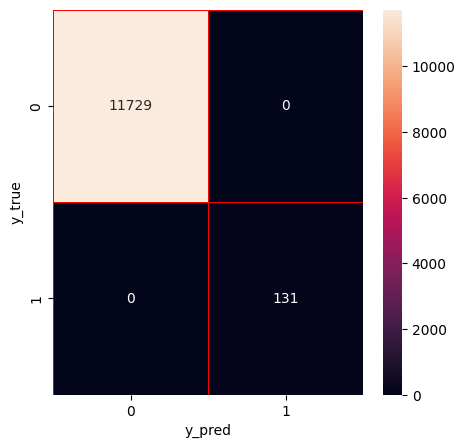

In [43]:
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [44]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



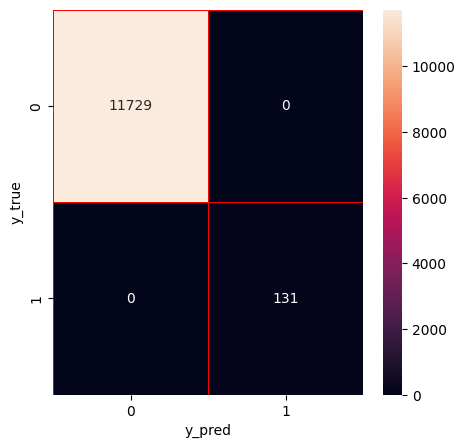

In [45]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [46]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



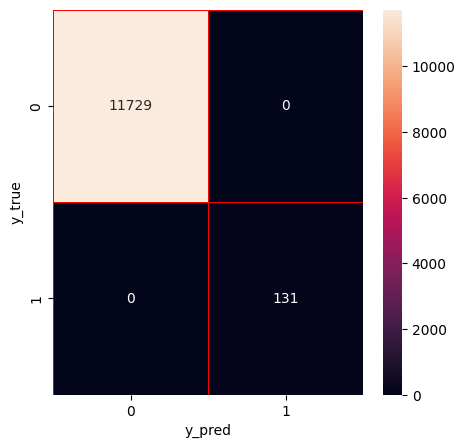

In [47]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)
# Extra trees training and prediction
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [48]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



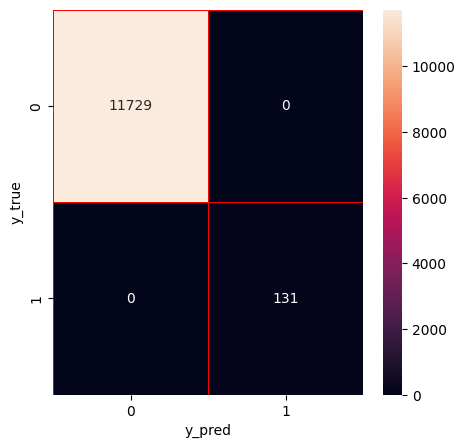

In [49]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [50]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [51]:
# Use the outputs of 4 base models to construct a new ensemble model
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [52]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [53]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

In [54]:
stk = xgb.XGBClassifier().fit(x_train, y_train)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



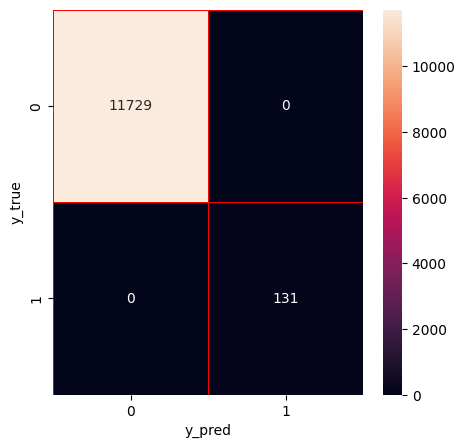

In [55]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [56]:
#Feature Selection Process

In [57]:
# Save the feature importance lists generated by four tree-based algorithms
dt_feature = dt.feature_importances_
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [58]:
# calculate the average importance value of each feature
avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

In [59]:
feature=(df.drop(['Label'],axis=1)).columns.values
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.6056, 'traffic_category_XMRIGCC CryptoMiner'), (0.0375, 'originp'), (0.0341, 'flow_iat.min'), (0.0302, 'id'), (0.0229, 'traffic_category_Benign'), (0.0227, 'originh'), (0.0221, 'fwd_pkts_payload.min'), (0.0183, 'bwd_header_size_min'), (0.0174, 'active.min'), (0.0152, 'bwd_header_size_max'), (0.0138, 'fwd_iat.min'), (0.0131, 'responh'), (0.011, 'flow_pkts_payload.min'), (0.0105, 'active.tot'), (0.01, 'fwd_header_size_min'), (0.0099, 'traffic_category_Background'), (0.0077, 'down_up_ratio'), (0.0073, 'bwd_init_window_size'), (0.0067, 'fwd_header_size_max'), (0.0065, 'bwd_subflow_pkts'), (0.0058, 'active.avg'), (0.0053, 'flow_pkts_per_sec'), (0.0043, 'fwd_subflow_pkts'), (0.0037, 'flow_iat.max'), (0.0036, 'fwd_iat.avg'), (0.0036, 'bwd_pkts_per_sec'), (0.0035, 'fwd_iat.tot'), (0.0034, 'fwd_init_window_size'), (0.0033, 'fwd_subflow_bytes'), (0.003, 'bwd_pkts_payload.min'), (0.0026, 'flow_pkts_payload.max'), (0.0024, 'fwd_iat.max'), (0.0023, 'flow_iat.avg'

In [60]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)

In [61]:
len(f_list)

90

In [62]:
# Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    if Sum>=0.9:
        break    

In [63]:
X_fs = df[fs].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [66]:
X_train.shape

(47438, 17)

In [67]:
pd.Series(y_train).value_counts()

0    46913
1      525
Name: count, dtype: int64

In [68]:
#Oversampling by SMOTE

In [69]:
from imblearn.over_sampling import SMOTE
# Calculate the desired number of samples for class 1 (minority class)
desired_samples_class_1 = df['Label'].value_counts()[0]
desired_samples_class_1
# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy={1: desired_samples_class_1}, n_jobs=-1)

In [70]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [71]:
pd.Series(y_train).value_counts()

1    51758
0    46913
Name: count, dtype: int64

In [72]:
#Modelling after feature selection:

Accuracy of DT: 1.0
Precision of DT: 1.0
Recall of DT: 1.0
F1-score of DT: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



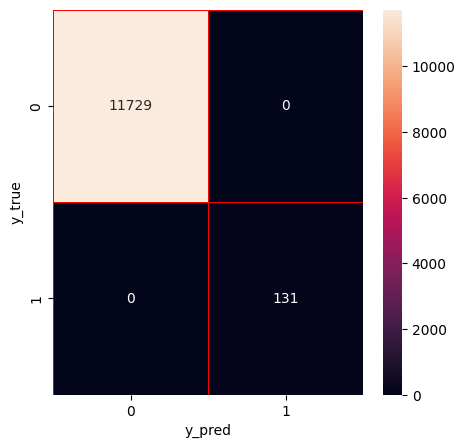

In [73]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [74]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 1.0
Precision of RF: 1.0
Recall of RF: 1.0
F1-score of RF: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



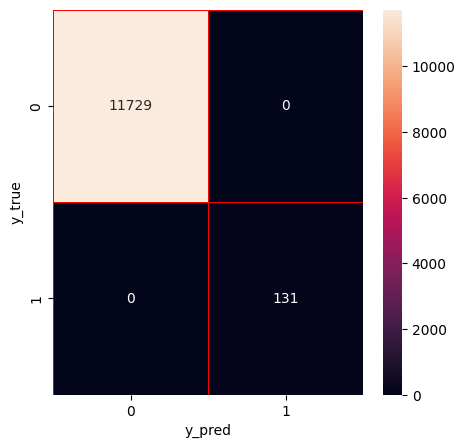

In [75]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) # modelin veri üzerinde öğrenmesi fit fonksiyonuyla yapılıyor
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [77]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 1.0
Precision of ET: 1.0
Recall of ET: 1.0
F1-score of ET: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



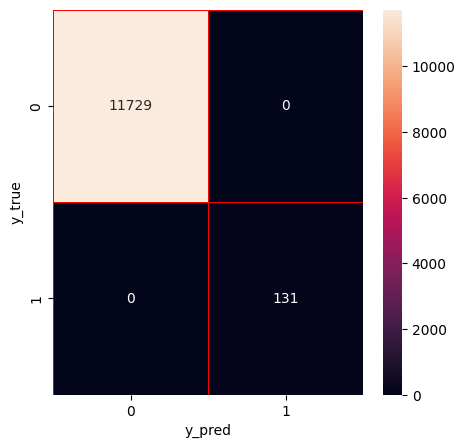

In [78]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [79]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 1.0
Precision of XGBoost: 1.0
Recall of XGBoost: 1.0
F1-score of XGBoost: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



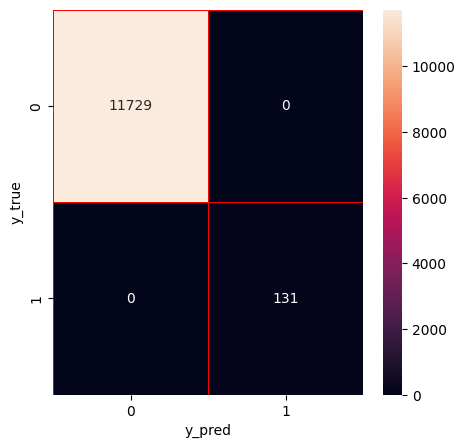

In [80]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [81]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [82]:
#Stacking Model Construction

In [83]:
base_predictions_train = pd.DataFrame( {
    'DecisionTree': dt_train.ravel(),
        'RandomForest': rf_train.ravel(),
     'ExtraTrees': et_train.ravel(),
     'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [84]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [85]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)

Accuracy of Stacking: 1.0
Precision of Stacking: 1.0
Recall of Stacking: 1.0
F1-score of Stacking: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11729
           1       1.00      1.00      1.00       131

    accuracy                           1.00     11860
   macro avg       1.00      1.00      1.00     11860
weighted avg       1.00      1.00      1.00     11860



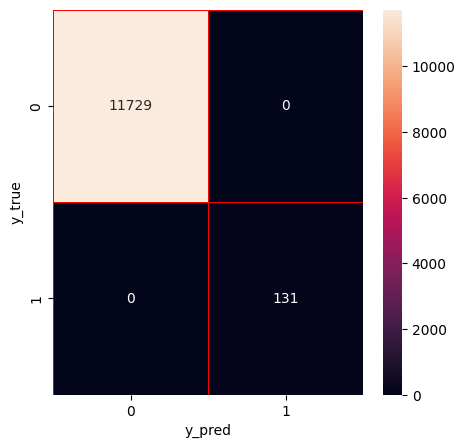

In [86]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()